In [1]:
# Useful starting lines
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
%load_ext autoreload
%autoreload 2

# Logistic Regression
## Classification Using Linear Regression
Load your data.

In [2]:
from helpers import sample_data, load_data, standardize

# load data.
height, weight, gender = load_data()

# build sampled x and y.
seed = 1
y = np.expand_dims(gender, axis=1)
X = np.c_[height.reshape(-1), weight.reshape(-1)]
y, X = sample_data(y, X, seed, size_samples=200)
x, mean_x, std_x = standardize(X)

Use `least_squares` to compute w, and visualize the results.

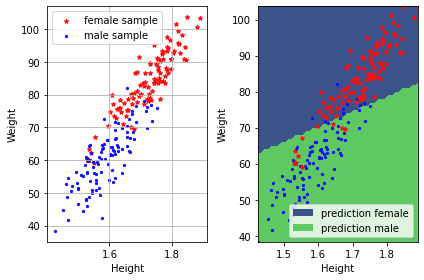

In [3]:
from least_squares import least_squares
from plots import visualization

def least_square_classification_demo(y, x):
    tx = np.c_[np.ones((y.shape[0], 1)), x]
    w,_ = least_squares(y, tx)

    visualization(y, x, mean_x, std_x, w, "classification_by_least_square")
    
least_square_classification_demo(y, x)

## Logistic Regression

Compute negative log likelihood loss.

In [6]:
def sigmoid(t):
    """apply the sigmoid function on t."""
    return(np.exp(t)/(np.exp(t)+1))

In [7]:
tx = np.c_[np.ones((y.shape[0], 1)), x]
w = np.zeros((tx.shape[1], 1))

In [8]:
def calculate_loss(y, tx, w):
    """compute the loss: negative log likelihood."""
    loss=0
    for i in range(tx.shape[0]):
        loss=loss+np.log(1+np.exp(tx[i].T@w))-y[i]*tx[i].T@w
    return loss

In [9]:
def calculate_gradient(y, tx, w):
    """compute the gradient of loss."""
    Xw=tx@w
    f = lambda x: sigmoid(x)
    sig = f(Xw)
    return (tx.T@(sig-y))

### Using Gradient Descent
Implement your function to calculate the gradient for logistic regression.

In [10]:
def learning_by_gradient_descent(y, tx, w, gamma):
    """
    Do one step of gradient descent using logistic regression.
    Return the loss and the updated w.
    """
    loss=calculate_loss(y, tx, w)
    gradient=calculate_gradient(y, tx, w)
    w=w-gamma*gradient
    return loss, w

Demo!

Current iteration=0, loss=[138.62943611]
Current iteration=100, loss=[43.46403231]
Current iteration=200, loss=[41.54589281]
Current iteration=300, loss=[41.09863897]
Current iteration=400, loss=[40.96487064]
Current iteration=500, loss=[40.92008946]
Current iteration=600, loss=[40.90418744]
Current iteration=700, loss=[40.89834995]
Current iteration=800, loss=[40.89616497]
Current iteration=900, loss=[40.89533753]
Current iteration=1000, loss=[40.89502196]
Current iteration=1100, loss=[40.89490109]
Current iteration=1200, loss=[40.89485466]
Current iteration=1300, loss=[40.8948368]
Current iteration=1400, loss=[40.89482992]
Current iteration=1500, loss=[40.89482727]
loss=[40.89482664]


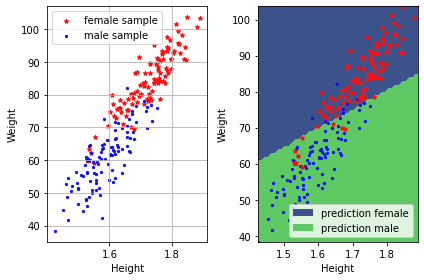

In [11]:
from helpers import de_standardize

def logistic_regression_gradient_descent_demo(y, x):
    # init parameters
    max_iter = 10000
    threshold = 1e-8
    gamma = 0.01
    losses = []

    # build tx
    tx = np.c_[np.ones((y.shape[0], 1)), x]
    w = np.zeros((tx.shape[1], 1))

    # start the logistic regression
    for iter in range(max_iter):
        # get loss and update w.
        loss, w = learning_by_gradient_descent(y, tx, w, gamma)
        # log info
        if iter % 100 == 0:
            print("Current iteration={i}, loss={l}".format(i=iter, l=loss))
        # converge criterion
        losses.append(loss)
        if len(losses) > 1 and np.abs(losses[-1] - losses[-2]) < threshold:
            break
    # visualization
    visualization(y, x, mean_x, std_x, w, "classification_by_logistic_regression_gradient_descent", True)
    print("loss={l}".format(l=calculate_loss(y, tx, w)))

logistic_regression_gradient_descent_demo(y, x)

Calculate your Hessian below

In [14]:
def calculate_hessian(y, tx, w):
    """return the Hessian of the loss function."""
    N=tx.shape[0]
    S=np.zeros((N,N), dtype=int)
    Xw=tx@w
    f = lambda x: sigmoid(x)
    sig = f(Xw)*(1-f(Xw))
    S=np.diagflat(sig)
    H=tx.T@S@tx
    return H

Write a function below to return loss, gradient, and Hessian.

In [15]:
def logistic_regression(y, tx, w):
    """return the loss, gradient, and Hessian."""
    loss=calculate_loss(y, tx, w)
    gradient=calculate_gradient(y, tx, w)
    hessian=calculate_hessian(y, tx, w)
    return loss, gradient, hessian

### Using Newton's method
Use Newton's method for logistic regression.

In [16]:
def learning_by_newton_method(y, tx, w, gamma):
    """
    Do one step on Newton's method.
    return the loss and updated w.
    """
    loss, gradient, hessian = logistic_regression(y, tx, w)
    w=w-gamma*np.linalg.inv(hessian)@gradient
    return loss, w

demo

Current iteration=0, the loss=[138.62943611]
Current iteration=1, the loss=[63.41155374]
Current iteration=2, the loss=[47.3045862]
Current iteration=3, the loss=[41.99746742]
Current iteration=4, the loss=[40.95639864]
Current iteration=5, the loss=[40.89511994]
Current iteration=6, the loss=[40.89482562]
Current iteration=7, the loss=[40.89482561]
loss=[40.89482561]


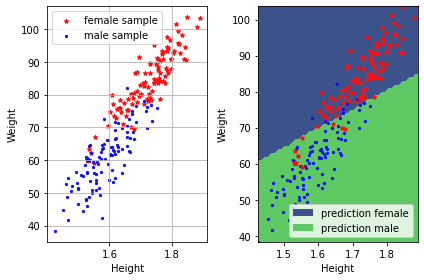

In [17]:
def logistic_regression_newton_method_demo(y, x):
    # init parameters
    max_iter = 100
    threshold = 1e-8
    gamma = 1
    losses = []

    # build tx
    tx = np.c_[np.ones((y.shape[0], 1)), x]
    w = np.zeros((tx.shape[1], 1))

    # start the logistic regression
    for iter in range(max_iter):
        # get loss and update w.
        loss, w = learning_by_newton_method(y, tx, w, gamma)
        # log info
        if iter % 1 == 0:
            print("Current iteration={i}, the loss={l}".format(i=iter, l=loss))
        # converge criterion
        losses.append(loss)
        if len(losses) > 1 and np.abs(losses[-1] - losses[-2]) < threshold:
            break
    # visualization
    visualization(y, x, mean_x, std_x, w, "classification_by_logistic_regression_newton_method",True)
    print("loss={l}".format(l=calculate_loss(y, tx, w)))

logistic_regression_newton_method_demo(y, x)

### Using penalized logistic regression
Fill in the function below.

In [18]:
def penalized_logistic_regression(y, tx, w, lambda_):
    """return the loss, gradient, and Hessian."""
    loss=calculate_loss(y, tx, w)
    loss=loss+lambda_/2*pow(np.linalg.norm(w),2)
    
    gradient=calculate_gradient(y, tx, w)
    gradient=gradient+lambda_*w
    
    return loss, gradient 

In [19]:
def learning_by_penalized_gradient(y, tx, w, gamma, lambda_):
    """
    Do one step of gradient descent, using the penalized logistic regression.
    Return the loss and updated w.
    """
    loss, gradient = penalized_logistic_regression(y, tx, w, lambda_)
    w=w-gamma*gradient
    return loss, w

In [26]:
def logistic_regression_penalized_gradient_descent_demo(y, x, lambda_):
    # init parameters
    max_iter = 10000
    gamma = 0.01
    threshold = 1e-8
    losses = []

    # build tx
    tx = np.c_[np.ones((y.shape[0], 1)), x]
    w = np.zeros((tx.shape[1], 1))

    # start the logistic regression
    for iter in range(max_iter):
        # get loss and update w.
        loss, w = learning_by_penalized_gradient(y, tx, w, gamma, lambda_)
        # log info
        if iter % 100 == 0:
            print("Current iteration={i}, loss={l}".format(i=iter, l=loss))
            print(np.linalg.norm(w))
        # converge criterion
        losses.append(loss)
        if len(losses) > 1 and np.abs(losses[-1] - losses[-2]) < threshold:
            break
    # visualization

    visualization(y, x, mean_x, std_x, w, "classification_by_logistic_regression_penalized_gradient_descent",True)
    print("loss={l}".format(l=calculate_loss(y, tx, w)))

Current iteration=0, loss=[138.62943611]
1.0520575411219553
Current iteration=100, loss=[43.46403231]
4.671286101584597
Current iteration=200, loss=[41.54589281]
5.926461338459194
Current iteration=300, loss=[41.09863897]
6.556092118015035
Current iteration=400, loss=[40.96487064]
6.90470143931832
Current iteration=500, loss=[40.92008946]
7.107529260453193
Current iteration=600, loss=[40.90418744]
7.228746675066593
Current iteration=700, loss=[40.89834995]
7.302309462037918
Current iteration=800, loss=[40.89616497]
7.347358036581641
Current iteration=900, loss=[40.89533753]
7.37509572604462
Current iteration=1000, loss=[40.89502196]
7.392231413480114
Current iteration=1100, loss=[40.89490109]
7.402839033447111
Current iteration=1200, loss=[40.89485466]
7.4094137973517915
Current iteration=1300, loss=[40.8948368]
7.413492103583737
Current iteration=1400, loss=[40.89482992]
7.416023082408199
Current iteration=1500, loss=[40.89482727]
7.4175942654296
[[ 0.23833206]
 [ 2.46258033]
 [-6.993

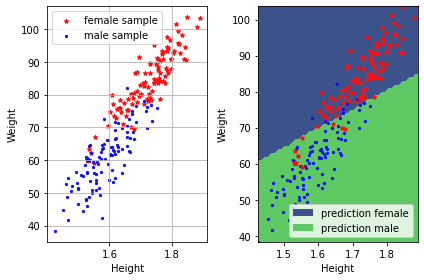

In [27]:
logistic_regression_penalized_gradient_descent_demo(y, x, 0)

Current iteration=0, loss=[138.62943611]
1.0520575411219553
Current iteration=100, loss=[46.07607269]
4.346722670035899
Current iteration=200, loss=[45.13699081]
5.18616044947619
Current iteration=300, loss=[45.0281699]
5.48246600745622
Current iteration=400, loss=[45.01325693]
5.593230795817229
Current iteration=500, loss=[45.01109478]
5.635547769869469
Current iteration=600, loss=[45.01077474]
5.651848556640913
Current iteration=700, loss=[45.010727]
5.658147620706195
Current iteration=800, loss=[45.01071985]
5.660584720307528
[[ 0.17574302]
 [ 1.52650506]
 [-5.44861329]]
loss=[41.80587009]


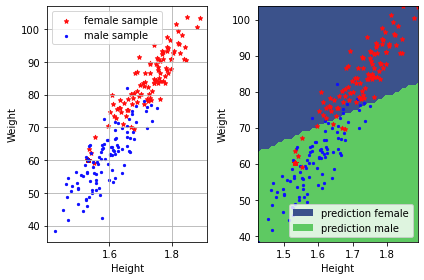

In [28]:
logistic_regression_penalized_gradient_descent_demo(y, x, 0.1)

Current iteration=0, loss=[138.62943611]
1.0520575411219553
Current iteration=100, loss=[52.99481411]
3.4369013619471755
Current iteration=200, loss=[52.92211438]
3.6242499240404547
Current iteration=300, loss=[52.92139058]
3.6432983651036346
[[ 0.10858943]
 [ 0.39561556]
 [-3.62193007]]
loss=[46.2780429]


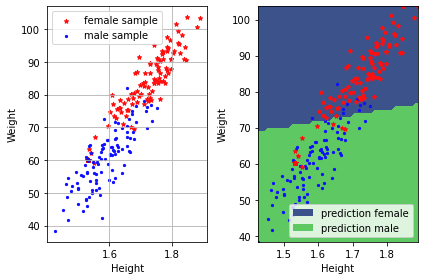

In [29]:
logistic_regression_penalized_gradient_descent_demo(y, x, 0.5)

In [30]:
from implementations import *

In [31]:
tx = np.c_[np.ones((y.shape[0], 1)), x]
w = np.zeros((tx.shape[1], 1))
lambda_=0.5
max_iter=10000
gamma = 0.01
logistic_regression_penalized_gradient_descent(y, tx, w, lambda_, max_iter, gamma)

Current iteration=0, loss=[138.62943611]
1.0520575411219553


(array([[ 0.10858943],
        [ 0.39561556],
        [-3.62193007]]),
 array([46.2780429]))

If we increase the value of λ, the norm of w is shrinking.
The same result is obtained as for logistic regression if we set λ=0.